In [8]:
from sympy import *
init_printing()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Cleaned data etc./data_cleaned_and_interpolated.csv'

# Adjust these column names as needed.
date_col = 'time'
target_col = 'KarupBro'
# List of meteorological features from DMI – update if needed.
input_cols = [
    'temp_min_daily', 'temp_max_daily', 'temp_mean_daily', 
    'temp_grass_mean_daily', 'temp_soil_min_daily', 'temp_soil_max_daily', 
    'temp_soil_mean_daily', 'humidity_daily', 'wind_direction_daily', 
    'wind_speed_daily', 'wind_gust_max_daily', 'precip_total_daily', 
    'precip_duration_daily', 'radiation_global_daily', 
    'sunshine_duration_daily'
]


# Read the CSV
df = pd.read_csv(DATA_PATH, parse_dates=[date_col])
df.sort_values(date_col, inplace=True)
df.reset_index(drop=True, inplace=True)

# Optional: Set the date column as index (if needed)
df.set_index(date_col, inplace=True)

df.tail()

,temp_min_daily,temp_max_daily,temp_mean_daily,temp_grass_mean_daily,temp_soil_min_daily,temp_soil_max_daily,temp_soil_mean_daily,humidity_daily,wind_direction_daily,wind_gust_max_daily,wind_speed_daily,precip_total_daily,precip_duration_daily,radiation_global_daily,sunshine_duration_daily,KarupBro
time,,,,,,,,,,,,,,,,
2023-12-20,0.8,4.4,3.141667,2.316667,5.1,5.4,5.241667,88.583333,252.000000,12.2,2.541667,0.4,4.0,349.0,111.0,4448.18
2023-12-21,1.4,8.7,5.316667,4.637500,5.0,5.3,5.141667,86.083333,254.666667,22.5,5.329167,19.9,159.0,270.0,29.5,5602.14
2023-12-22,0.1,4.0,2.395833,1.129167,4.0,5.1,4.533333,66.000000,293.416667,19.1,5.020833,0.6,3.0,749.0,294.5,6636.60
2023-12-23,-1.6,3.3,0.833333,-0.250000,3.6,4.1,3.754167,88.000000,264.000000,10.5,2.379167,0.8,4.0,589.0,247.0,5809.15
2023-12-24,-0.3,2.1,1.120000,0.700000,3.4,3.6,3.520000,97.700000,136.500000,6.6,1.500000,5.0,38.0,9.0,0.0,5197.78


In [10]:
# Replace outliers with NaN
df.loc[df["temp_mean_daily"] > 35, "temp_mean_daily"] = np.nan

# Forward-fill (ffill) the missing values
df["temp_mean_daily"] = df["temp_mean_daily"].ffill()

# Replace outliers with NaN
df.loc[df["precip_total_daily"] > 100, "precip_total_daily"] = np.nan

# Forward-fill (ffill) the missing values
df["precip_total_daily"] = df["precip_total_daily"].ffill()

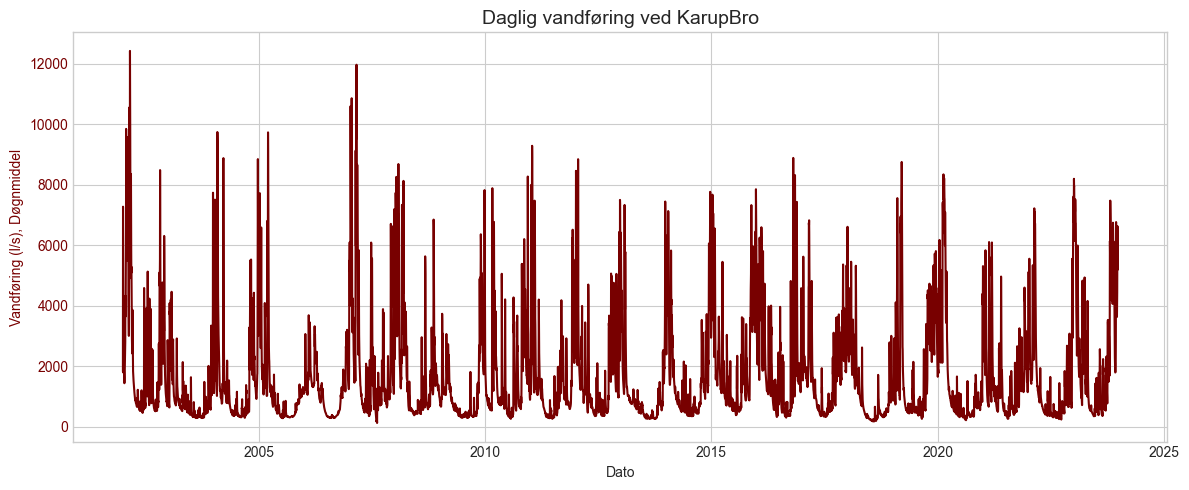

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Stiltema (til hele rapporten)
plt.style.use('seaborn-v0_8-whitegrid')

# Tailwind-inspired palette (named)
colors = {
    "barn_red": "#780000",               # primary for inflow
    "fire_brick": "#c1121f",             # alternative red
    "papaya_whip": "#fdf0d5",            # background / highlight
    "prussian_blue": "#003049",          # dark blue
    "air_superiority_blue": "#669bbc"    # for precipitation
}

# Create a plot with the updated palette
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.index, df['KarupBro'], color=colors["barn_red"], linewidth=1.5)
ax.set_title("Daglig vandføring ved KarupBro", fontsize=14)
ax.set_ylabel("Vandføring (l/s), Døgnmiddel", color=colors["barn_red"])
ax.set_xlabel("Dato")
ax.tick_params(axis='y', labelcolor=colors["barn_red"])
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()


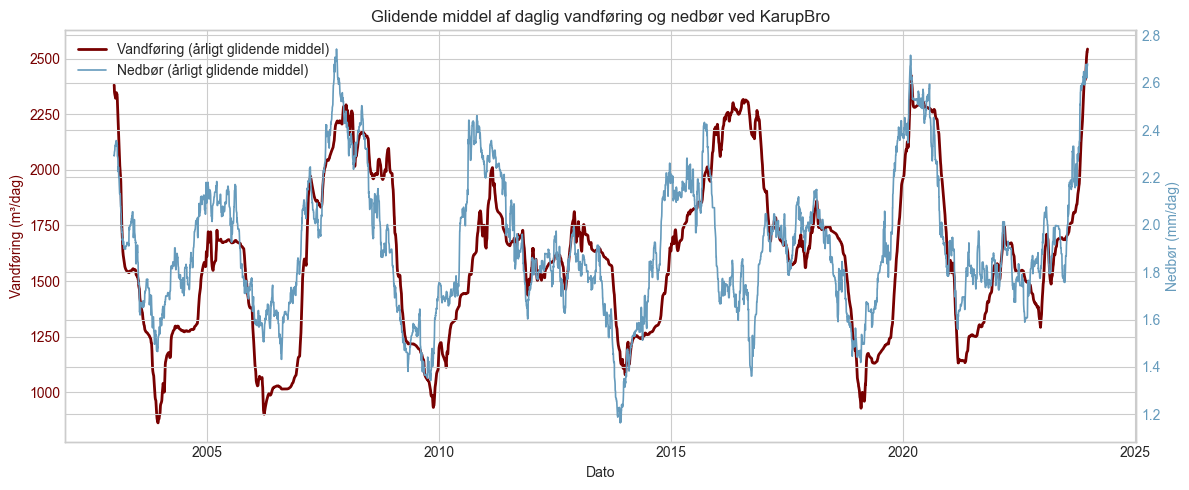

In [14]:
# Calculate 30-day rolling mean of inflow
df['KarupBro_rolling30'] = df['KarupBro'].rolling(window=365).mean()
# Calculate 30-day rolling mean of precipitation
df['precip_total_daily_rolling30'] = df['precip_total_daily'].rolling(window=365).mean()

# Tailwind-stil farver
tailwind_colors = {
    "barn_red": "#780000",               # inflow
    "air_superiority_blue": "#669bbc"    # precipitation
}

# Plot inflow (rolling mean) and precipitation (original) with dual axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Rolling mean inflow
ax1.plot(df.index, df['KarupBro_rolling30'], color=tailwind_colors["barn_red"], linewidth=2, label='Vandføring (årligt glidende middel)')
ax1.set_ylabel('Vandføring (m³/dag)', color=tailwind_colors["barn_red"])
ax1.tick_params(axis='y', labelcolor=tailwind_colors["barn_red"])
ax1.set_xlabel("Dato")
ax1.set_title("Glidende middel af daglig vandføring og nedbør ved KarupBro")

# Precipitation (original values)
ax2 = ax1.twinx()
ax2.plot(df.index, df['precip_total_daily_rolling30'], color=tailwind_colors["air_superiority_blue"], linewidth=1.2, label='Nedbør (årligt glidende middel)')
ax2.set_ylabel('Nedbør (mm/dag)', color=tailwind_colors["air_superiority_blue"])
ax2.tick_params(axis='y', labelcolor=tailwind_colors["air_superiority_blue"])

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Combined legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_37495/794421058.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_37495/794421058.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


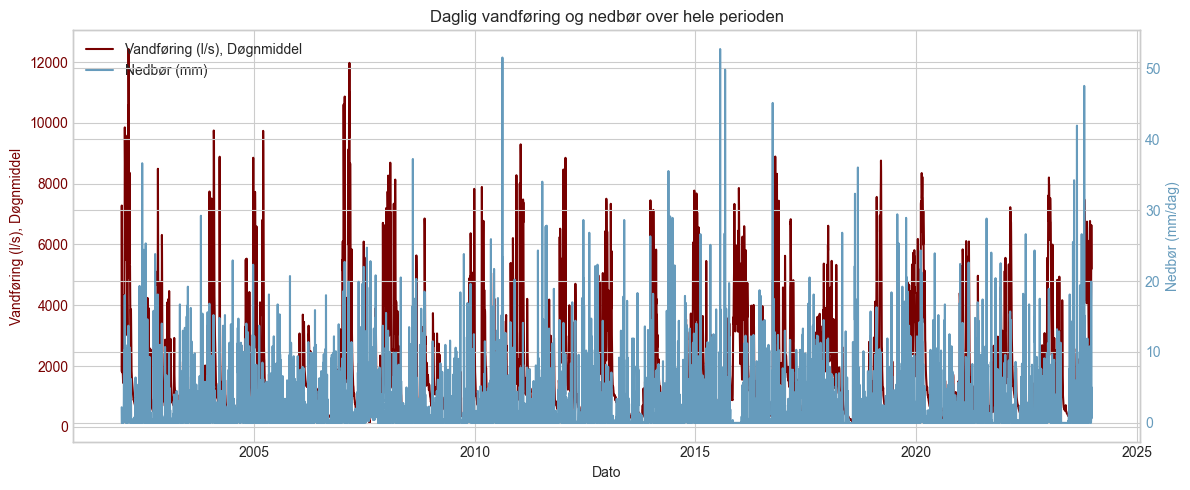

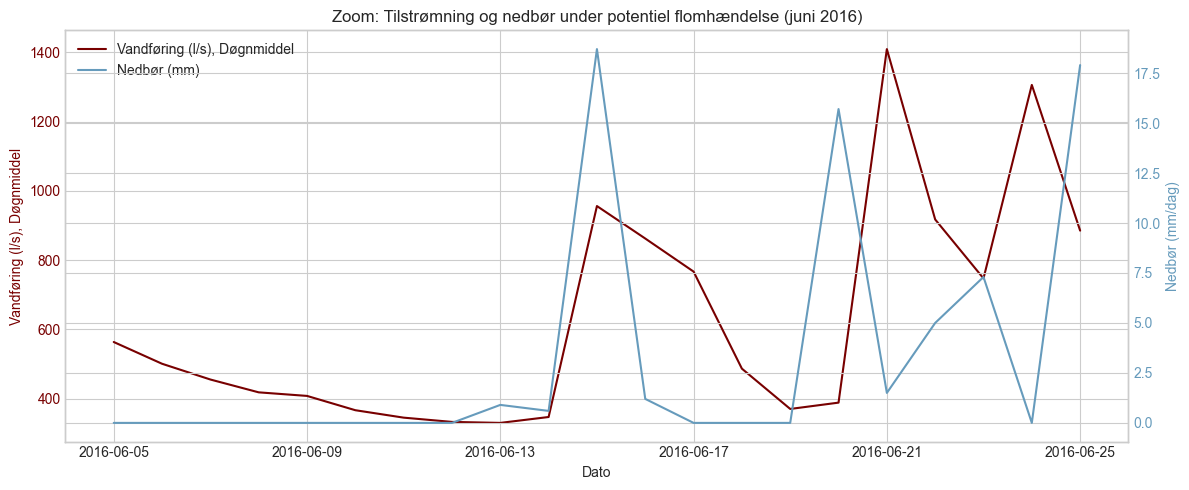

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Stiltema (til hele rapporten)
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Introducerende plot af inflow og nedbør (sekundær akse)
fig1, ax1 = plt.subplots(figsize=(12, 5))

ln1 = ax1.plot(df.index, df['KarupBro'], color=colors["barn_red"], label='Vandføring (l/s), Døgnmiddel')
ax1.set_ylabel('Vandføring (l/s), Døgnmiddel',color=colors["barn_red"])
ax1.tick_params(axis='y', labelcolor=colors["barn_red"])

# Sekundær akse for nedbør
ax2 = ax1.twinx()
ln2 = ax2.plot(df.index, df['precip_total_daily'], color=colors["air_superiority_blue"], label='Nedbør (mm)')
ax2.set_ylabel('Nedbør (mm/dag)', color=colors["air_superiority_blue"])
ax2.tick_params(axis='y', labelcolor=colors["air_superiority_blue"])

# Samlet legend
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.set_title('Daglig vandføring og nedbør over hele perioden')
ax1.set_xlabel('Dato')
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig1.tight_layout()

# 2. Zoom ind på kendt flomhændelse (eks. januar 2007 – du kan ændre interval her)
zoom_start = '2016-06-05'
zoom_end = '2016-06-25'
df_zoom = df.loc[zoom_start:zoom_end]

fig2, ax3 = plt.subplots(figsize=(12, 5))
ln3 = ax3.plot(df_zoom.index, df_zoom['KarupBro'], color=colors["barn_red"], label='Vandføring (l/s), Døgnmiddel')
ax3.set_ylabel('Vandføring (l/s), Døgnmiddel', color=colors["barn_red"])
ax3.tick_params(axis='y', labelcolor=colors["barn_red"])

ax4 = ax3.twinx()
ln4 = ax4.plot(df_zoom.index, df_zoom['precip_total_daily'], color=colors["air_superiority_blue"], label='Nedbør (mm)')
ax4.set_ylabel('Nedbør (mm/dag)', color=colors["air_superiority_blue"])
ax4.tick_params(axis='y', labelcolor=colors["air_superiority_blue"])

lns_zoom = ln3 + ln4
labels_zoom = [l.get_label() for l in lns_zoom]
ax3.legend(lns_zoom, labels_zoom, loc='upper left')
ax3.set_title('Zoom: Tilstrømning og nedbør under potentiel flomhændelse (juni 2016)')
ax3.set_xlabel('Dato')
fig2.tight_layout()

fig1.show()
fig2.show()


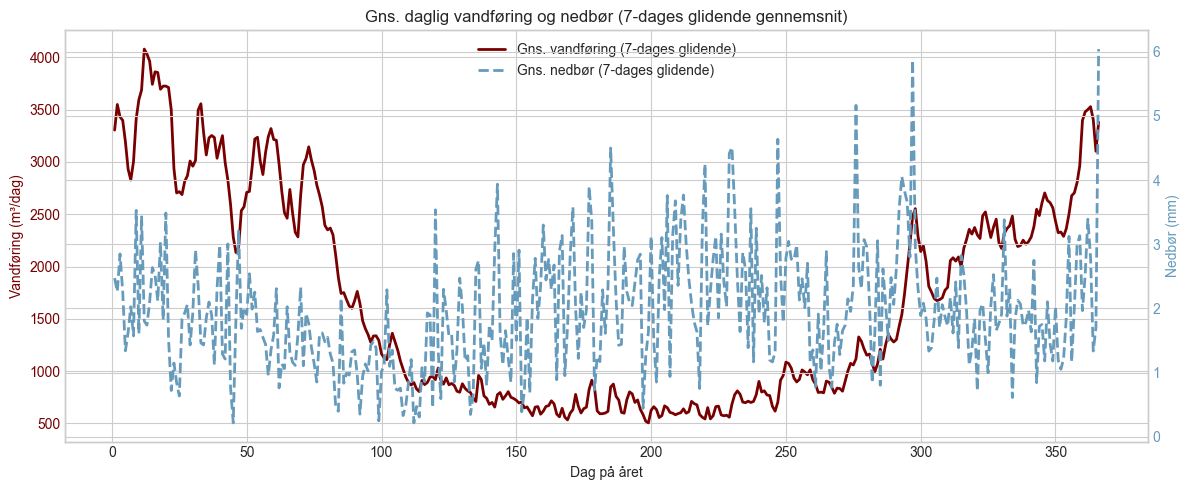

In [ ]:
# Extract day of year from index
df['day_of_year'] = df.index.dayofyear

# Group by day of year to compute average values
mean_by_day = df.groupby('day_of_year')[['KarupBro', 'precip_total_daily']].mean()

# # Calculate 7-dages glidende gennemsnit af de daglige gennemsnitsværdier (across all years)
# mean_by_day_smooth = mean_by_day.rolling(window=30, center=True).mean()

# Plot den glidede version
fig, ax1 = plt.subplots(figsize=(12, 5))

# Vandføring (smoothed)
ax1.plot(mean_by_day.index, mean_by_day['KarupBro'], color='#780000', linewidth=2, label='Gns. vandføring (7-dages glidende)')
ax1.set_ylabel('Vandføring (m³/dag)', color='#780000')
ax1.tick_params(axis='y', labelcolor='#780000')
ax1.set_xlabel('Dag på året')
ax1.set_title('Gns. daglig vandføring og nedbør (7-dages glidende gennemsnit)')

# Nedbør (smoothed)
ax2 = ax1.twinx()
ax2.plot(mean_by_day.index, mean_by_day['precip_total_daily'], color='#669bbc', linestyle='--', linewidth=2, label='Gns. nedbør (7-dages glidende)')
ax2.set_ylabel('Nedbør (mm)', color='#669bbc')
ax2.tick_params(axis='y', labelcolor='#669bbc')

# Combine legends
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

plt.tight_layout()
plt.show()



/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_37495/2452926524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='KarupBro', data=df, palette=['#780000']*12)


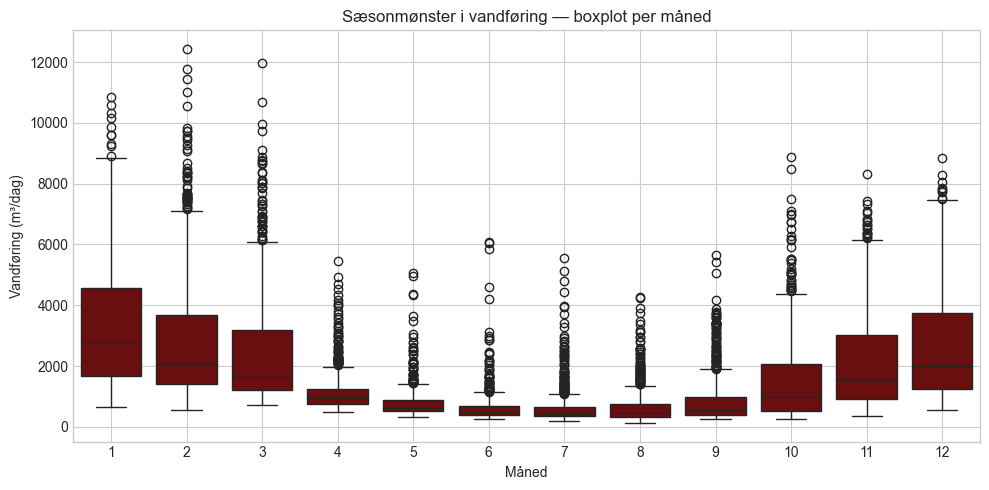

In [42]:
# Extract month for grouping
df['month'] = df.index.month

# Boxplot over vandføring per måned
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='KarupBro', data=df, palette=['#780000']*12)
plt.title('Sæsonmønster i vandføring — boxplot per måned')
plt.xlabel('Måned')
plt.ylabel('Vandføring (m³/dag)')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_37495/2474907420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='precip_total_daily', data=df, palette=['#669bbc']*12)


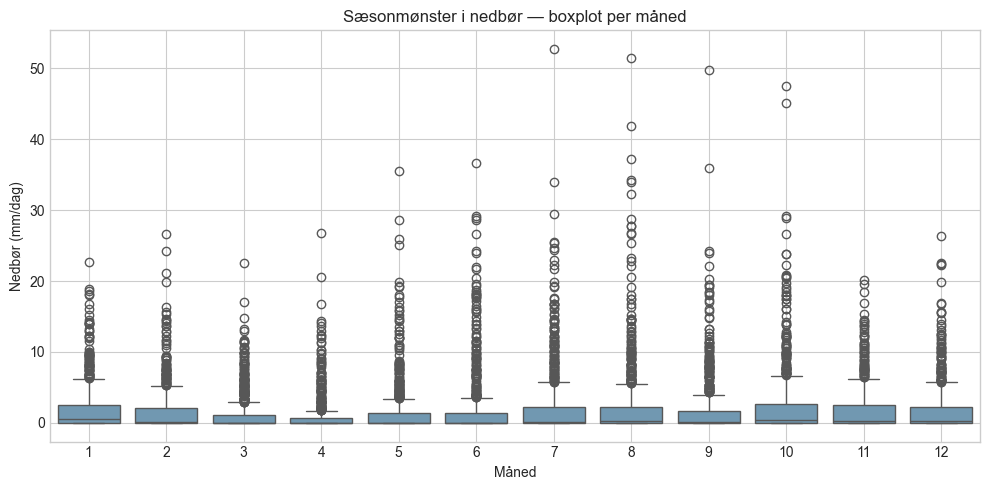

In [41]:
# Extract month for grouping
df['month'] = df.index.month

# Boxplot over vandføring per måned
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='precip_total_daily', data=df, palette=['#669bbc']*12)
plt.title('Sæsonmønster i nedbør — boxplot per måned')
plt.xlabel('Måned')
plt.ylabel('Nedbør (mm/dag)')
plt.grid(True)
plt.tight_layout()
plt.show()

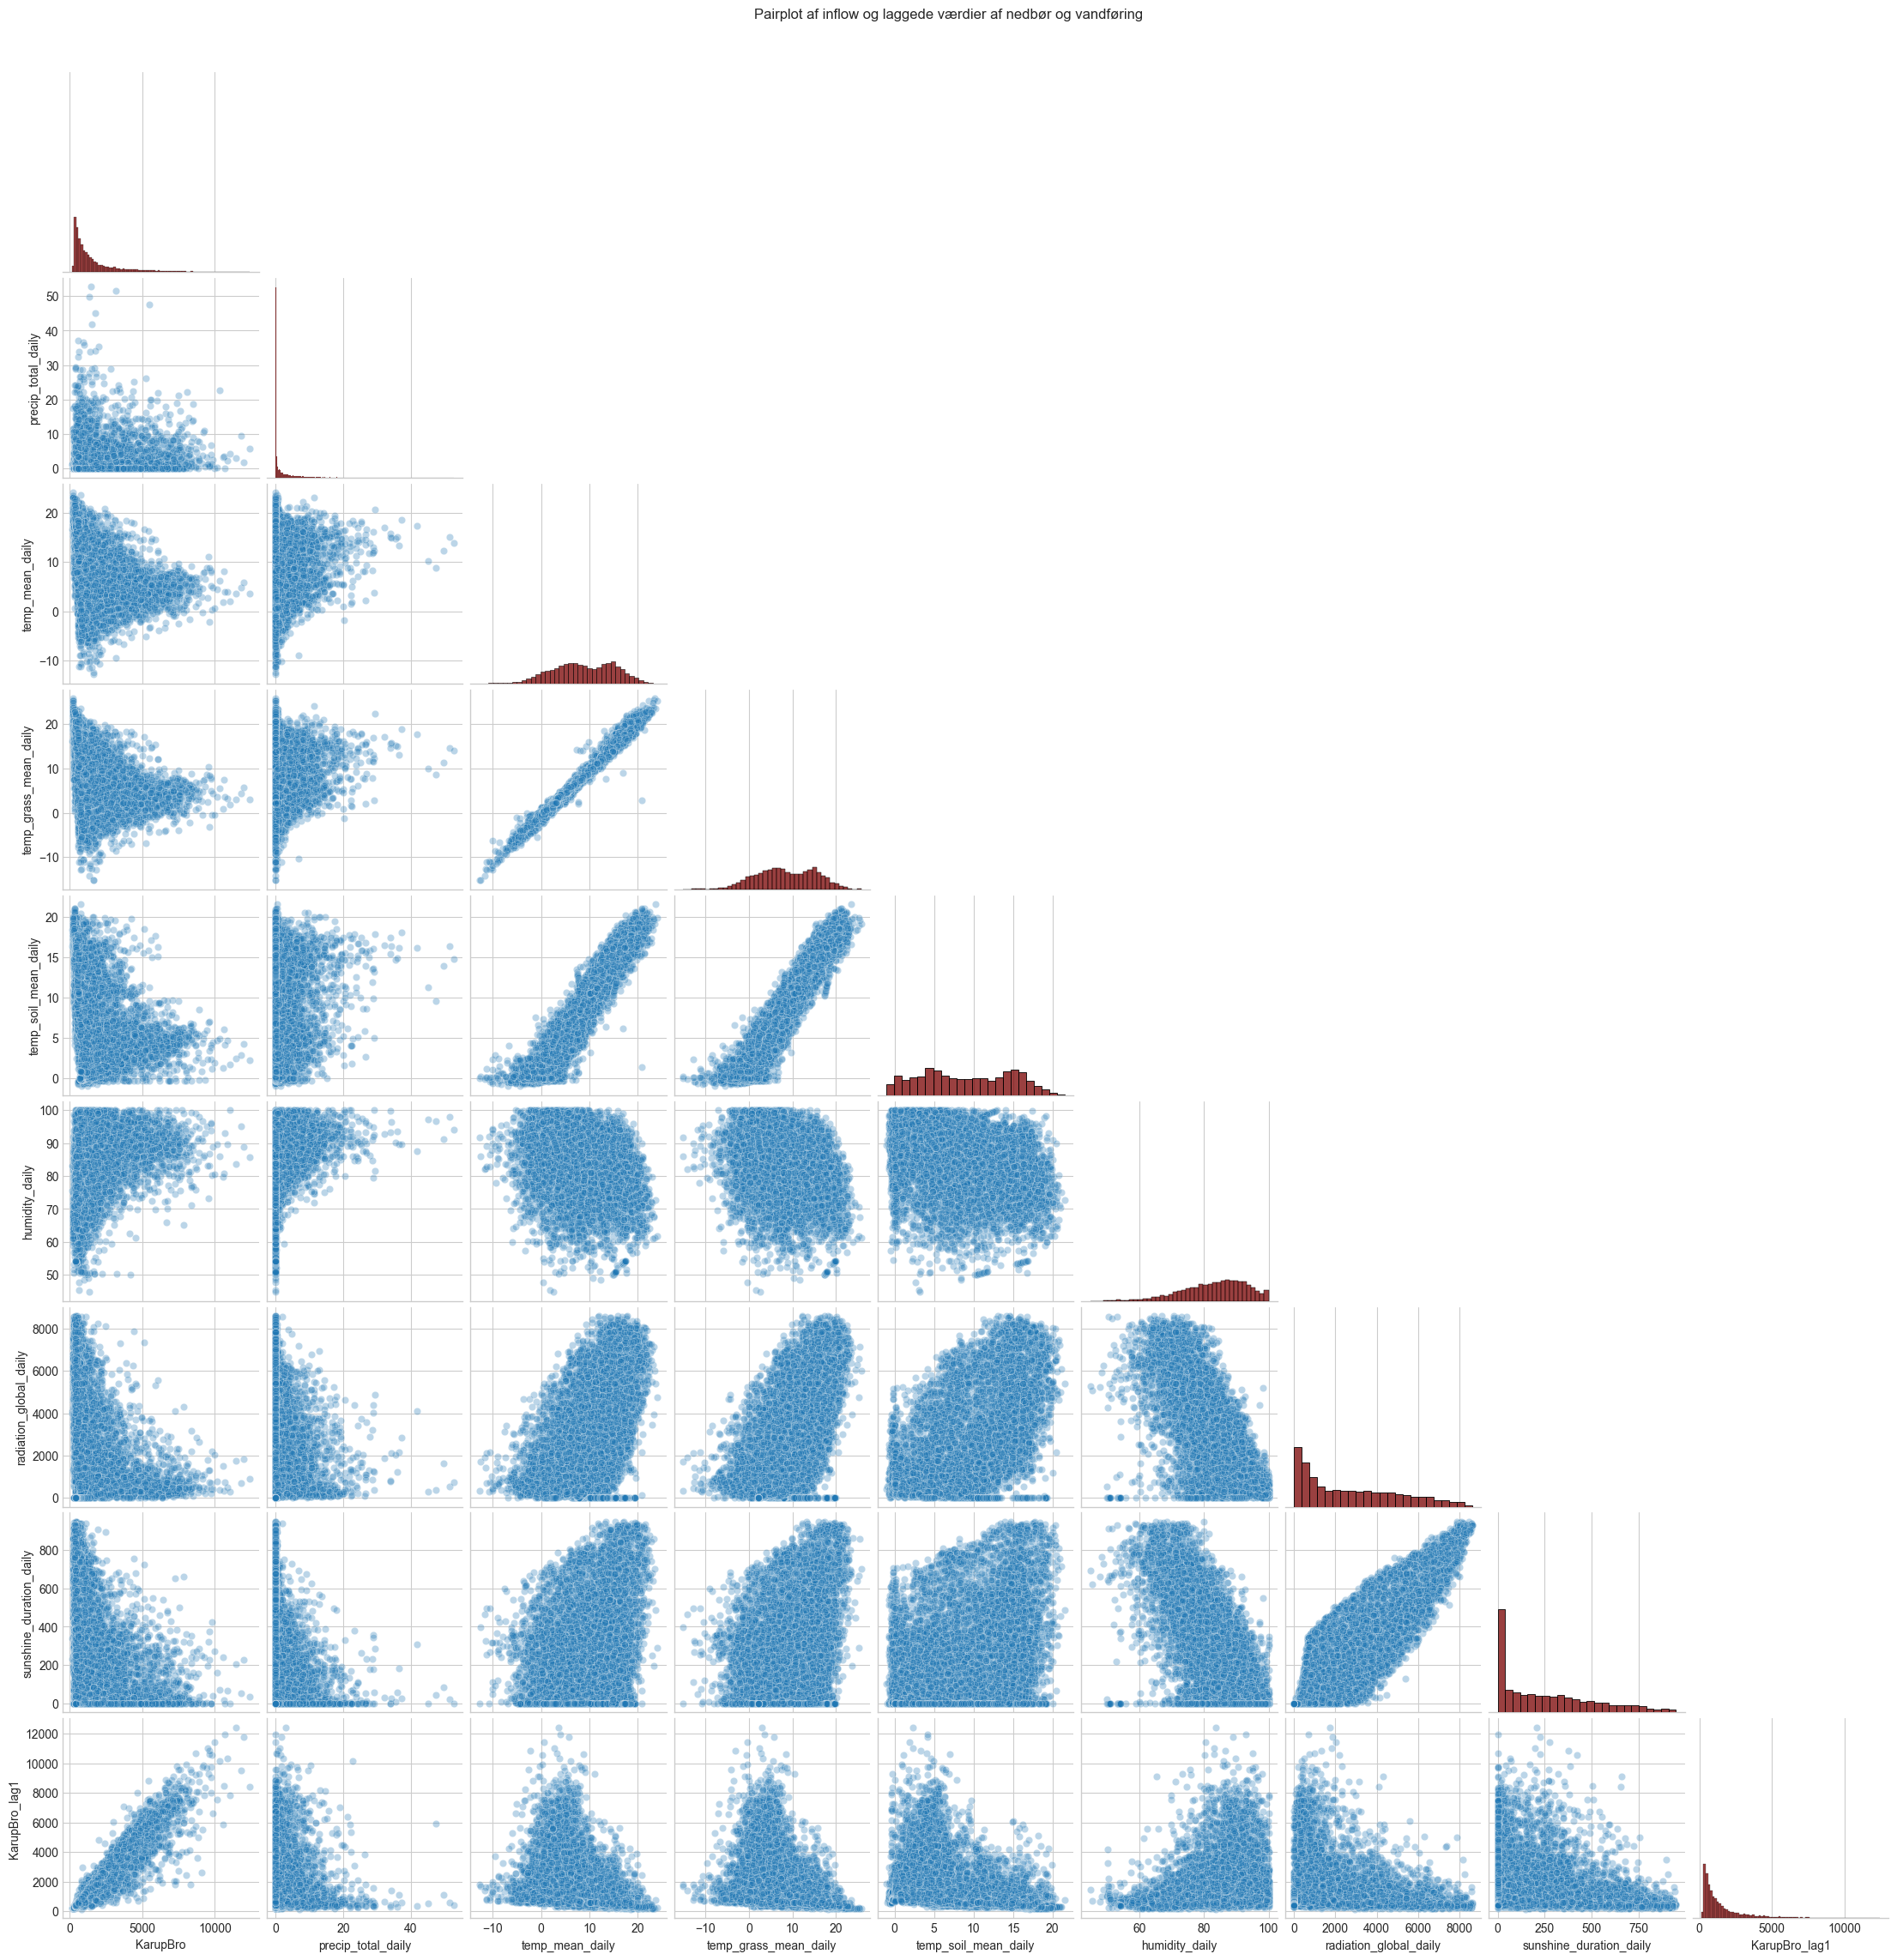

In [46]:
# Udvælg et sæt relevante variable til pairplot
selected_vars = [
    'KarupBro',
    'precip_total_daily',
    'temp_mean_daily',
    'temp_grass_mean_daily',
    'temp_soil_mean_daily',
    'humidity_daily',
    'radiation_global_daily',
    'sunshine_duration_daily',
    'KarupBro_lag1',
]

# Drop NA values for clean plotting
pairplot_df = df[selected_vars].dropna()

# Plot pairplot
sns.pairplot(pairplot_df, corner=True, plot_kws={'alpha': 0.3}, diag_kws={'color': '#780000'})
plt.suptitle("Pairplot af inflow og laggede værdier af nedbør og vandføring", y=1.02)
plt.show()


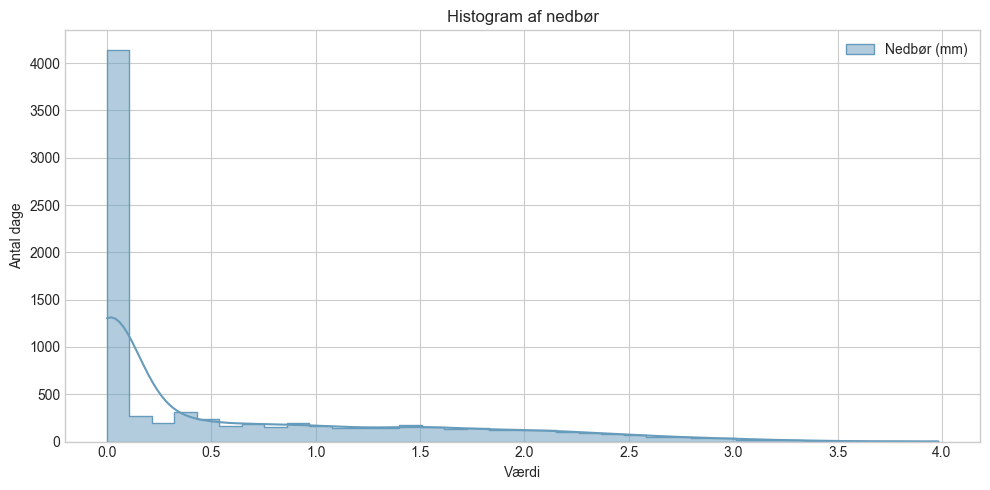

In [26]:
# Plot histogrammer af både nedbør og vandføring
df['log_inflow'] = np.log1p(df['KarupBro'])      # log(1 + x) for at undgå log(0)
df['log_precip'] = np.log1p(df['precip_total_daily'])


plt.figure(figsize=(10, 5))

sns.histplot(df['log_precip'], color='#669bbc', kde=True, label='Nedbør (mm)', element='step', fill=True, alpha=0.5)

plt.title("Histogram af nedbør")
plt.xlabel("Værdi")
plt.ylabel("Antal dage")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

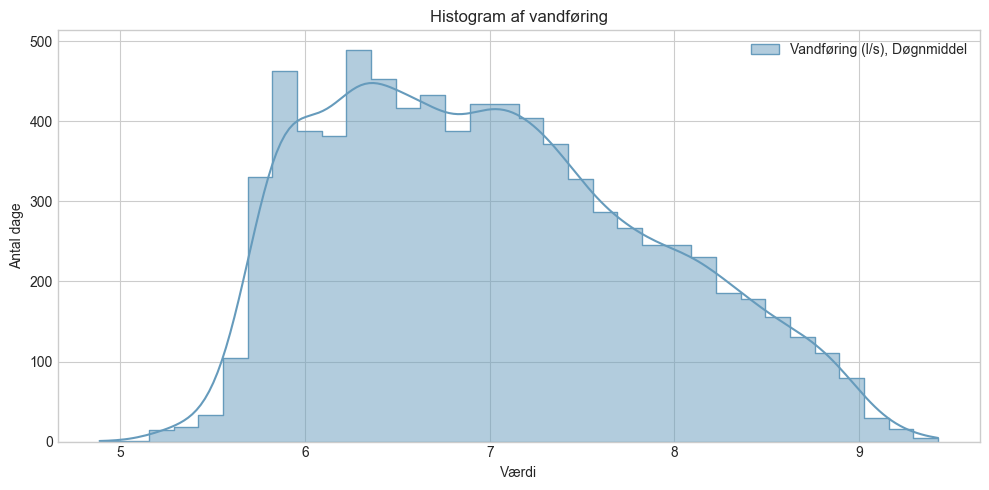

In [27]:

# Plot histogrammer af både nedbør og vandføring
plt.figure(figsize=(10, 5))

sns.histplot(df['log_inflow'], color='#669bbc', kde=True, label='Vandføring (l/s), Døgnmiddel', element='step', fill=True, alpha=0.5)

plt.title("Histogram af vandføring")
plt.xlabel("Værdi")
plt.ylabel("Antal dage")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


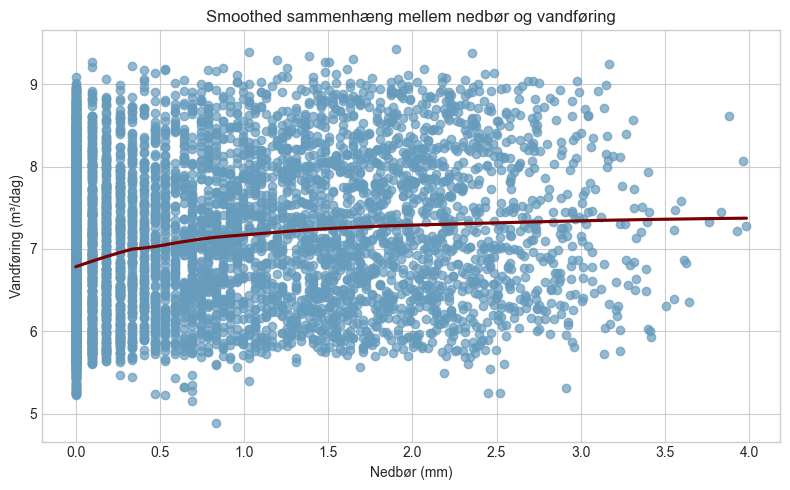

In [33]:
import seaborn as sns

# Create smoothed scatterplot (regression with kernel smoothing)
plt.figure(figsize=(8, 5))
sns.regplot(
    x='log_precip',
    y='log_inflow',
    data=df,
    scatter_kws={'alpha': 0.7, 'color': '#669bbc'},
    line_kws={'color': '#780000'},
    lowess=True
)
plt.title("Smoothed sammenhæng mellem nedbør og vandføring")
plt.xlabel("Nedbør (mm)")
plt.ylabel("Vandføring (m³/dag)")
plt.grid(True)
plt.tight_layout()
plt.show()